In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from datetime import datetime
import random
import matplotlib.dates as mdates

# Función util para colorear
def random_color():
    return '#%02X%02X%02X' % (random.randint(0,255),random.randint(0,255),random.randint(0,255))


#Importamos excel de datos
raw_data = pd.read_excel("bdd/Datos_2024.xlsx")
#Ver tabla de datos
raw_data

,Paciente,Archivo audio,H/M,timestamp audio,dosis última ingesta [Mg],tiempo transcurrido desde última ingesta [Horas],F0,F1,F2,F3,F4,Intensidad Media,Jitter \n%,Shimmer\n%,Shimmer\ndB,HNR,NHR
0,Paciente 1,paciente1_031213_a_inicial.wav,H,2024-04-08-09,2.0,1.0,245.58060,907.73640,1339.3350,2480.6770,3351.7380,61.602750,0.001670,0.024440,0.259270,23.843970,0.024630
1,Paciente 1,paciente1_101213_a_inicial.wav,H,2024-04-08-10,2.0,2.0,247.37380,931.60430,1446.9550,2987.8190,3934.7370,61.239210,0.000870,0.017900,0.169150,22.570010,0.009050
2,Paciente 1,paciente1_261113_a_inicial.wav,H,2024-04-08-11,2.0,3.0,231.71770,903.44410,1421.0860,2219.3800,3145.4510,62.573790,0.001720,0.028100,0.251650,22.629720,0.010430
3,Paciente 1,paciente1_291013_a_inicial.wav,H,2024-04-08-12,1.0,0.0,187.94460,948.69990,1411.8480,2779.6160,3981.1090,52.851400,0.001910,0.045330,0.395710,18.984520,0.021450
4,Paciente 1,paciente1_031213_a_inicial.wav,H,2024-04-08-13,1.0,1.0,245.58060,907.73640,1339.3350,2480.6770,3351.7380,61.602750,0.001670,0.024440,0.259270,23.843970,0.024630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Paciente 4,paciente2_20161215_a_inicial.wav,M,2024-04-09-12,1.1,3.0,266.74263,939.68600,1665.2680,3099.4337,4279.7216,65.817466,0.001221,0.027621,0.244167,26.819727,0.006094
60,Paciente 4,paciente2_20161026_a_inicio_tratamiento.wav,M,2024-04-09-13,2.2,0.0,216.16870,993.61273,1676.0205,3152.3217,4251.5099,46.228644,0.003432,0.056672,0.503206,17.625707,0.045903
61,Paciente 4,paciente2_20161110_a_inicial.wav,M,2024-04-09-14,2.2,1.0,257.71515,936.81214,1629.5169,3369.8599,4404.5331,72.850987,0.001650,0.054527,0.488026,22.674817,0.014487
62,Paciente 4,paciente2_20161124_a_inicial.wav,M,2024-04-09-15,2.2,2.0,246.50362,890.68441,1603.4326,2780.8462,4079.2257,57.563946,0.001441,0.033891,0.298639,23.198021,0.010736


In [2]:
new_columns = ["id_paciente", "id_audio", "sexo", "t_audio", "dosis_ingesta", "dt_ingesta", "F0", "F1" , "F2", "F3", "F4", "intensidad_media", "jitter", "p_shimmer", "db_shimmer", "hnr", "nhr"]
n_columns = len(new_columns)
datos = raw_data

datos.columns = new_columns
datos['t_audio'] = pd.to_datetime(datos['t_audio'])
for s in range(len(datos['sexo'])):
    if datos['sexo'][s] == 'M':
        datos.loc[s, 'sexo'] = 0
    elif datos['sexo'][s] == 'H':
        datos.loc[s, 'sexo'] = 1
    
datos  

,id_paciente,id_audio,sexo,t_audio,dosis_ingesta,dt_ingesta,F0,F1,F2,F3,F4,intensidad_media,jitter,p_shimmer,db_shimmer,hnr,nhr
0,Paciente 1,paciente1_031213_a_inicial.wav,1,2024-04-08 09:00:00,2.0,1.0,245.58060,907.73640,1339.3350,2480.6770,3351.7380,61.602750,0.001670,0.024440,0.259270,23.843970,0.024630
1,Paciente 1,paciente1_101213_a_inicial.wav,1,2024-04-08 10:00:00,2.0,2.0,247.37380,931.60430,1446.9550,2987.8190,3934.7370,61.239210,0.000870,0.017900,0.169150,22.570010,0.009050
2,Paciente 1,paciente1_261113_a_inicial.wav,1,2024-04-08 11:00:00,2.0,3.0,231.71770,903.44410,1421.0860,2219.3800,3145.4510,62.573790,0.001720,0.028100,0.251650,22.629720,0.010430
3,Paciente 1,paciente1_291013_a_inicial.wav,1,2024-04-08 12:00:00,1.0,0.0,187.94460,948.69990,1411.8480,2779.6160,3981.1090,52.851400,0.001910,0.045330,0.395710,18.984520,0.021450
4,Paciente 1,paciente1_031213_a_inicial.wav,1,2024-04-08 13:00:00,1.0,1.0,245.58060,907.73640,1339.3350,2480.6770,3351.7380,61.602750,0.001670,0.024440,0.259270,23.843970,0.024630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Paciente 4,paciente2_20161215_a_inicial.wav,0,2024-04-09 12:00:00,1.1,3.0,266.74263,939.68600,1665.2680,3099.4337,4279.7216,65.817466,0.001221,0.027621,0.244167,26.819727,0.006094
60,Paciente 4,paciente2_20161026_a_inicio_tratamiento.wav,0,2024-04-09 13:00:00,2.2,0.0,216.16870,993.61273,1676.0205,3152.3217,4251.5099,46.228644,0.003432,0.056672,0.503206,17.625707,0.045903
61,Paciente 4,paciente2_20161110_a_inicial.wav,0,2024-04-09 14:00:00,2.2,1.0,257.71515,936.81214,1629.5169,3369.8599,4404.5331,72.850987,0.001650,0.054527,0.488026,22.674817,0.014487
62,Paciente 4,paciente2_20161124_a_inicial.wav,0,2024-04-09 15:00:00,2.2,2.0,246.50362,890.68441,1603.4326,2780.8462,4079.2257,57.563946,0.001441,0.033891,0.298639,23.198021,0.010736


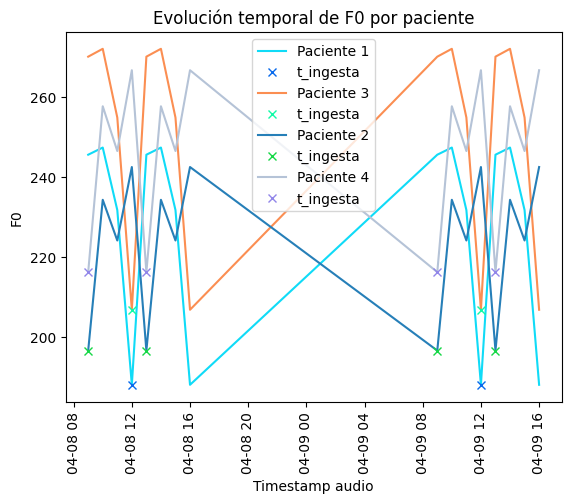

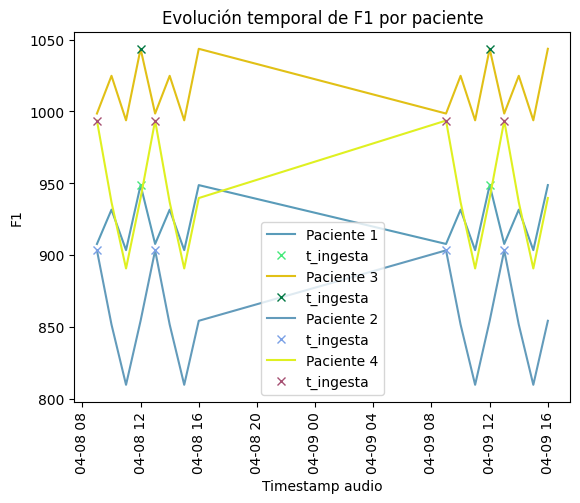

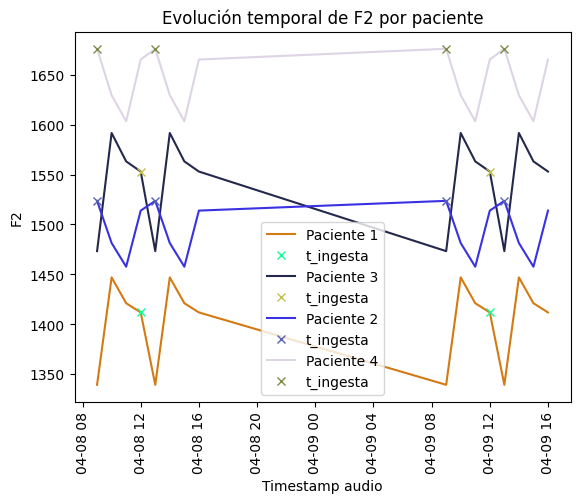

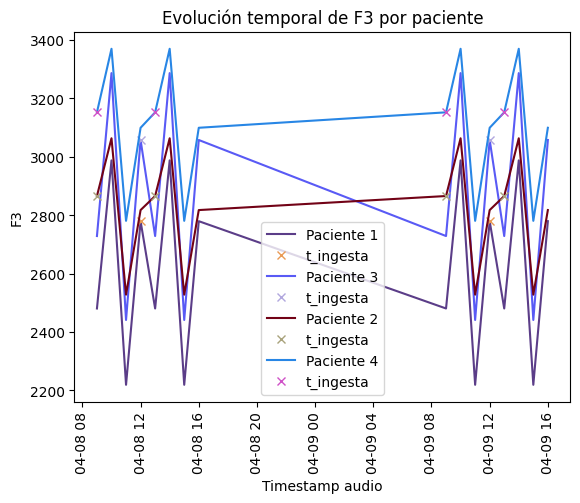

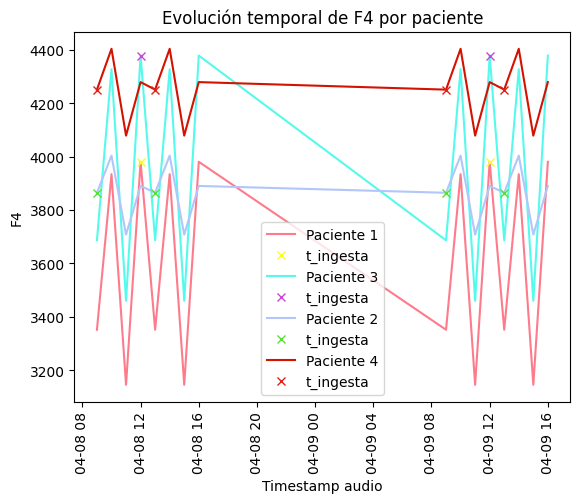

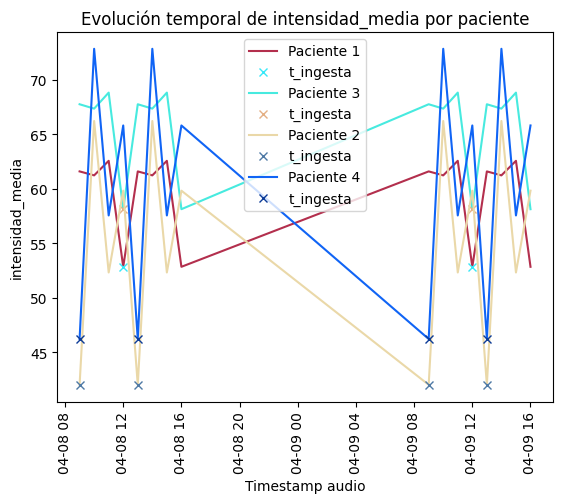

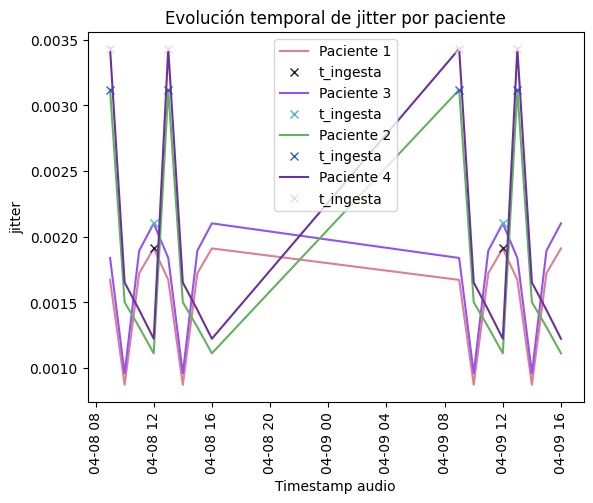

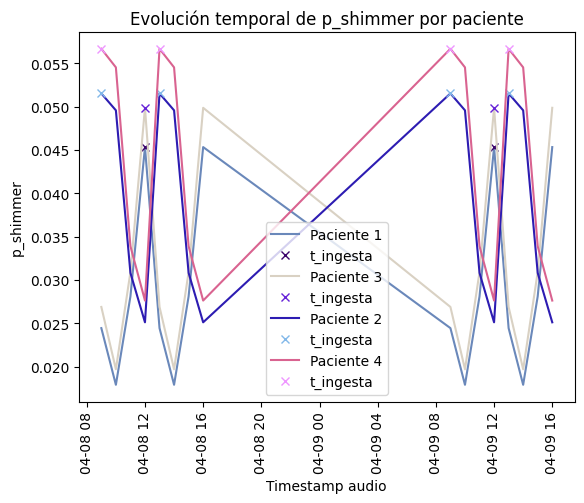

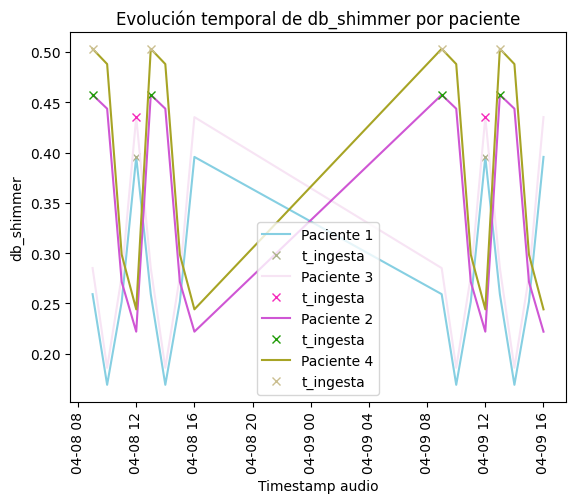

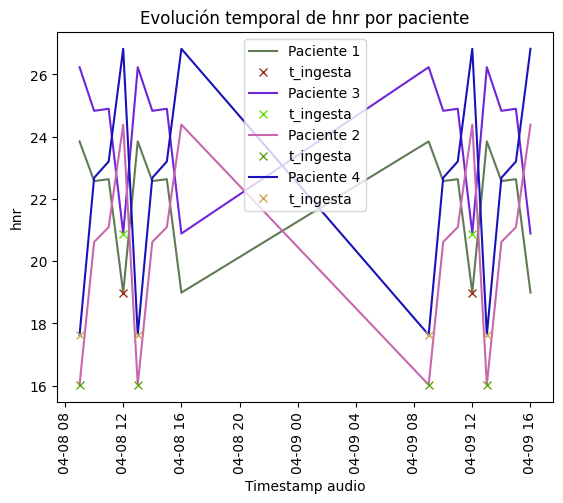

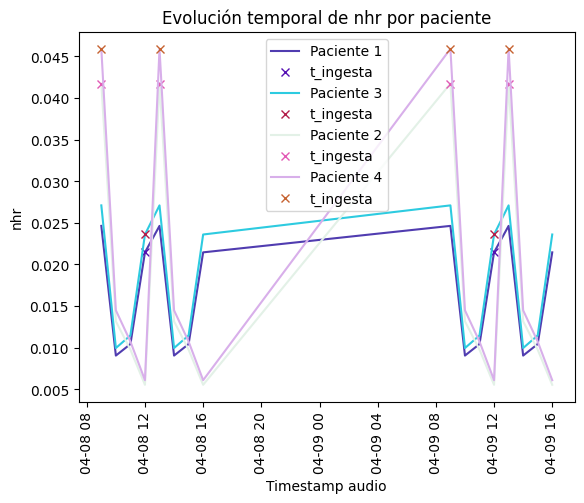

In [3]:
random.seed(10)

variables = ["F0", "F1", "F2", "F3", "F4", "intensidad_media", "jitter", "p_shimmer", "db_shimmer", "hnr", "nhr"]

pacientes = datos.loc[:,'id_paciente'].unique()

for variable in variables:
    for paciente in pacientes:
        
        #Se crea un DataFrame para el paciente actual
        df = datos[datos['id_paciente']== paciente]

        #Se recuperan los distintos timestamps de cada audio  
        t_audios = df['t_audio']#.reset_index(drop=True)
        
        #Se guarda la columna que contiene los tiempos de ingesta
        df_ingesta = df[df['dt_ingesta']==0]
        #t_ingesta = df_ingesta['t_audio'].astype(int)#.unique()
        t_ingesta = df_ingesta['t_audio'].values.astype(float)

        #Se identifica la variable actual, y se guarda la columna con los datos del paciente de dicha variable
        var = df[variable]

        #Se grafica el valor de cada variable en función de los timestamps
        plt.plot(t_audios, var, label= paciente, color = random_color())

        #Se marcan en el grafico los momentos de ingesta de cada paciente 
        plt.plot( df_ingesta['t_audio'], df_ingesta[variable], 'x', color = random_color(), label = 't_ingesta' )
    
    #Configuraciones del grafico:    
    plt.xlabel('Timestamp audio')
    plt.xticks(rotation = 90)
    plt.ylabel(variable)
    plt.legend()
    plt.title(f'Evolución temporal de {variable} por paciente')
        

    
    file_name = f'grafico_{variable}.png'
    #file_path = f'graficos/deepnote/general/{file_name}'
    file_path = f'../../media/graficos/deepnote/general/{file_name}'
    
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    
    
    plt.show()

    plt.close()
    

In [5]:
print(pd.__version__)

1.3.5


In [42]:
print(matplotlib.__version__)

3.9.1


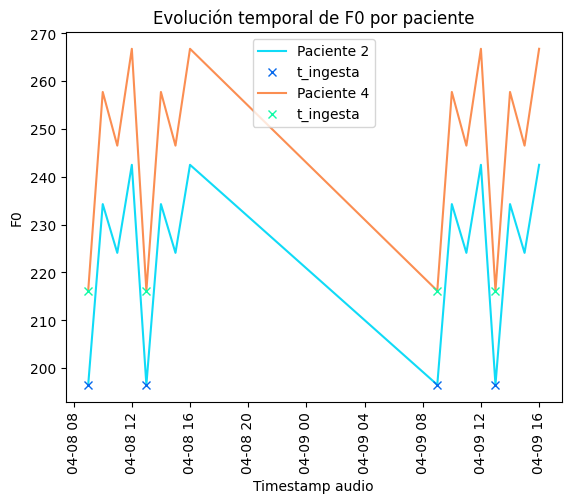

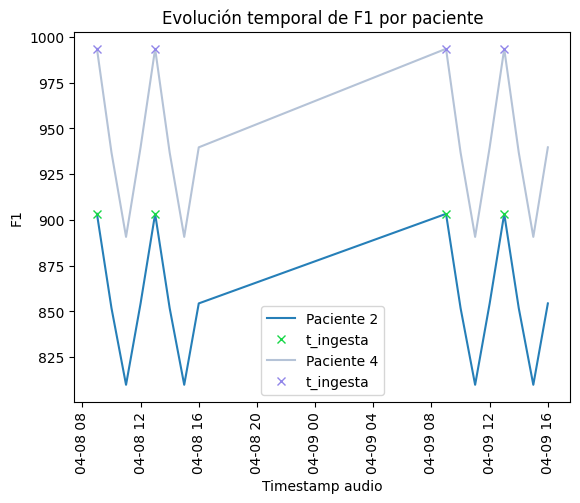

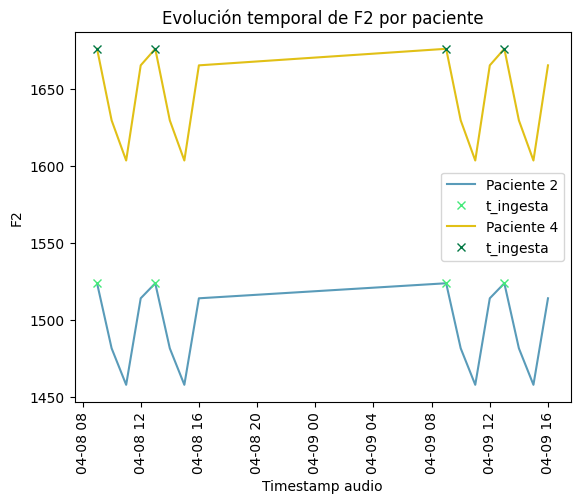

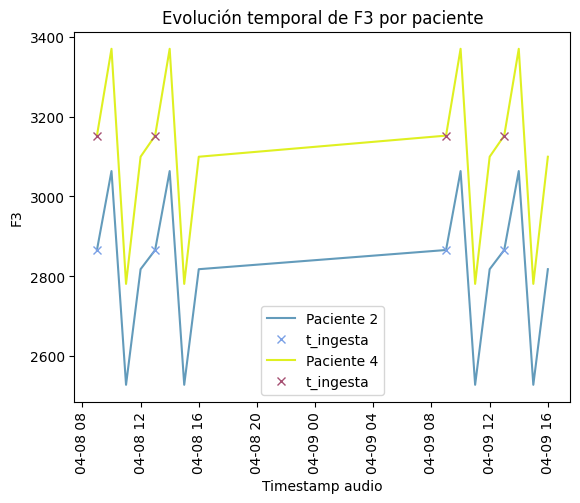

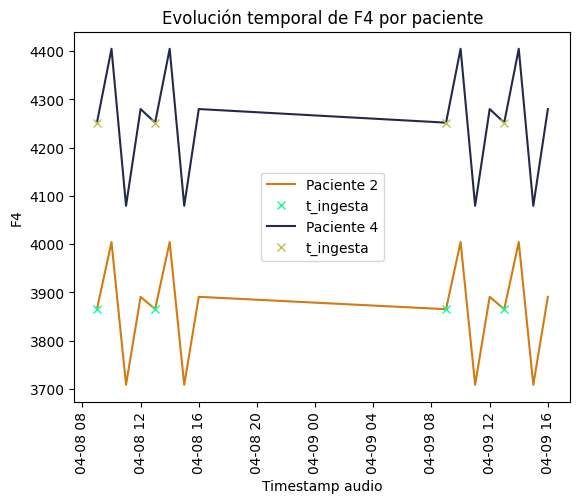

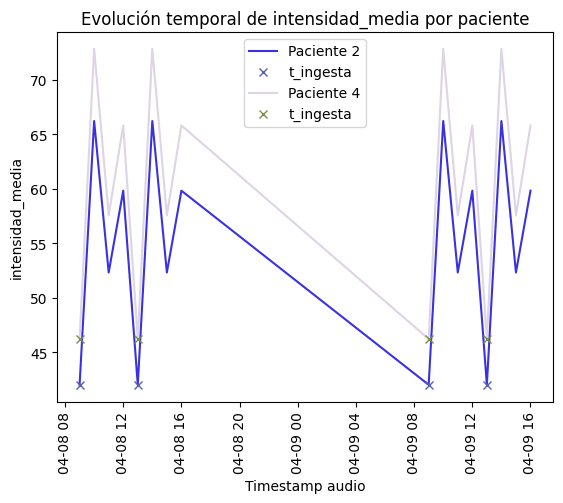

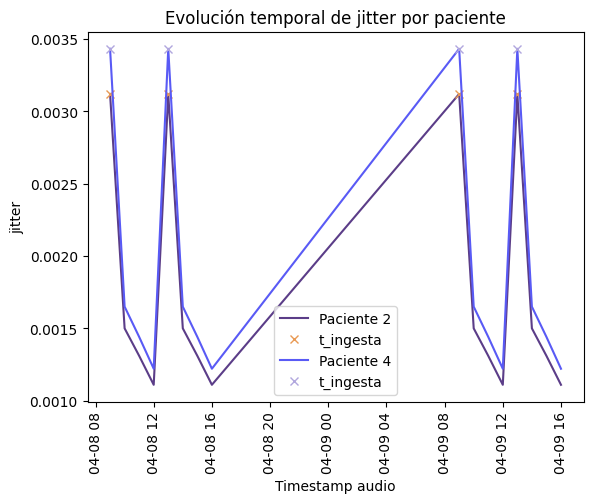

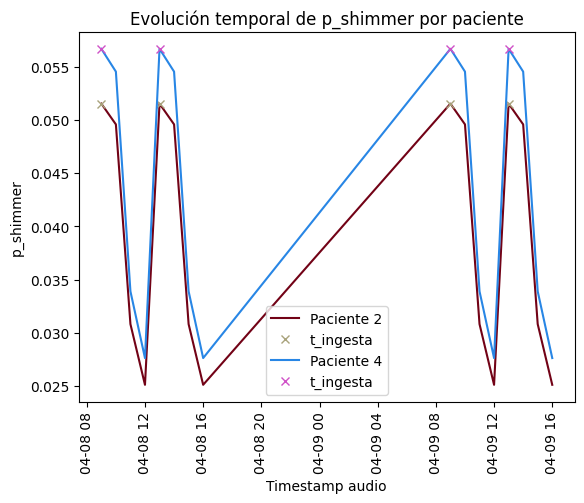

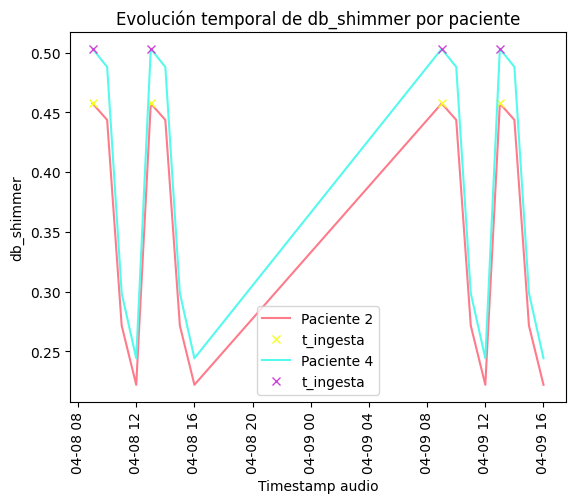

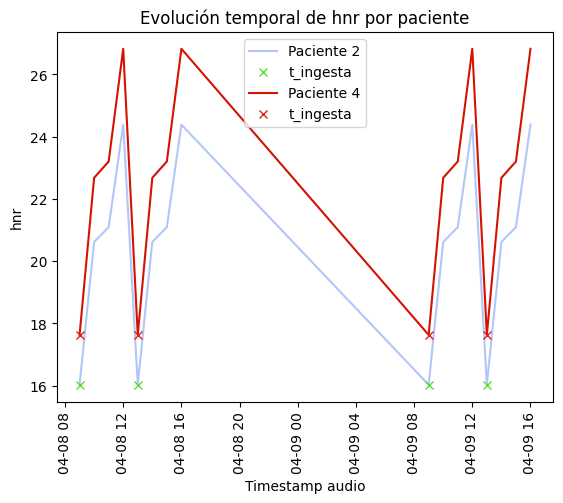

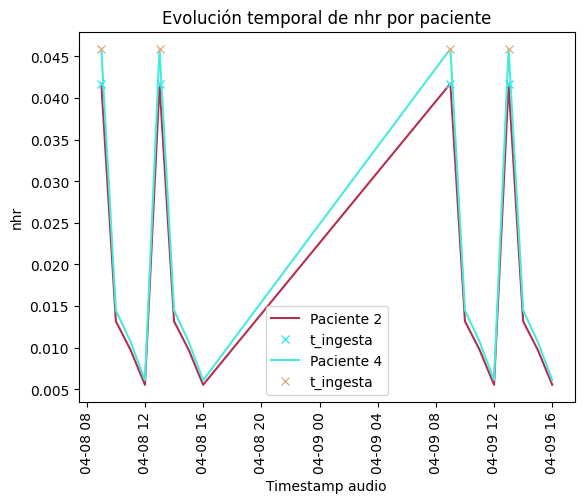

In [6]:
#Gráficos anteriores, solo para Mujeres

random.seed(10)

variables = ["F0", "F1", "F2", "F3", "F4", "intensidad_media", "jitter", "p_shimmer", "db_shimmer", "hnr", "nhr"]

pacientes = datos.loc[:,'id_paciente'].unique()

for variable in variables:
    for paciente in pacientes:
        #Se crea un DataFrame para el paciente actual
        df = datos[datos['id_paciente']== paciente].reset_index()
        if df['sexo'][0] == 0:
            #Se recuperan los distintos timestamps de cada audio  
            t_audios = df['t_audio']#.reset_index(drop=True)
        
            #Se guarda la columna que contiene los tiempos de ingesta
            df_ingesta = df[df['dt_ingesta']==0]
            t_ingesta = df_ingesta['t_audio'].values.astype(float)#.unique()
            #Se identifica la variable actual, y se guarda la columna con los datos del paciente de dicha variable
            var = df[variable]

            #Se grafica el valor de cada variable en función de los timestamps
            plt.plot(t_audios, var, label= paciente, color = random_color())
            #Se marcan en el grafico los momentos de ingesta de cada paciente 
            plt.plot( df_ingesta['t_audio'], df_ingesta[variable], 'x', color = random_color(), label = 't_ingesta' )
        else:
            continue
    #Configuraciones del grafico:    
    plt.xlabel('Timestamp audio')
    plt.xticks(rotation = 90)
    plt.ylabel(variable)
    plt.legend()
    plt.title(f'Evolución temporal de {variable} por paciente')

        
    file_name = f'grafico_mujer_{variable}.png'
    #file_path = f'graficos/deepnote/mujeres/{file_name}'
    file_path = f'../../media/graficos/deepnote/mujeres/{file_name}'
    
    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    
    plt.show()

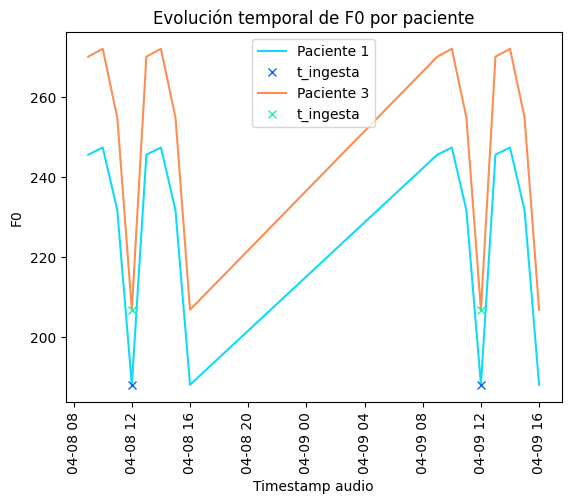

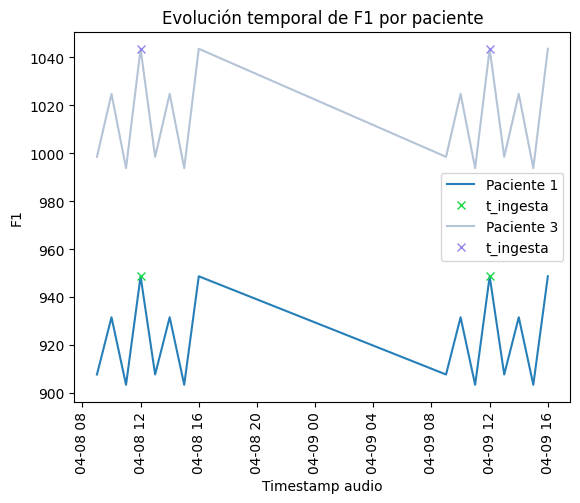

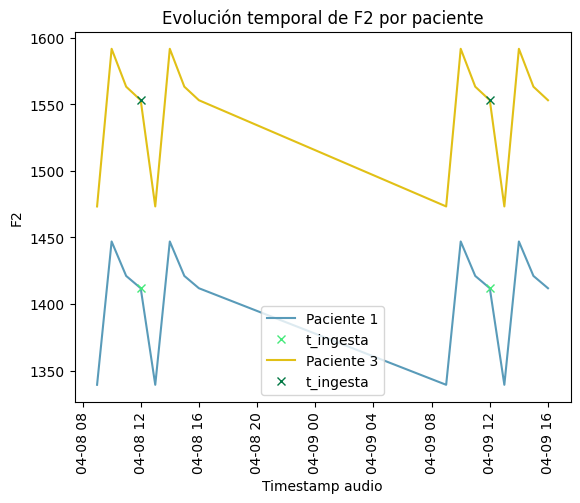

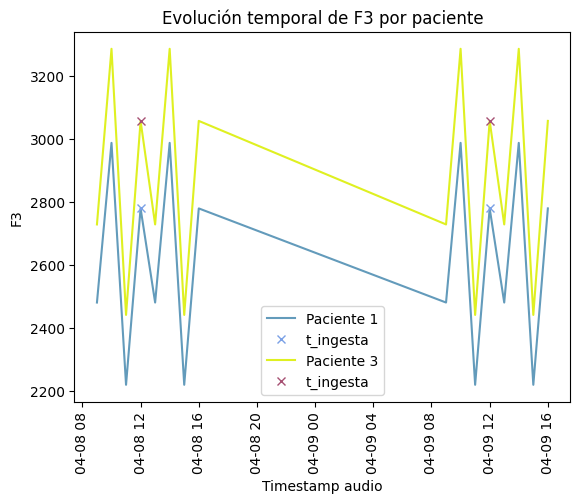

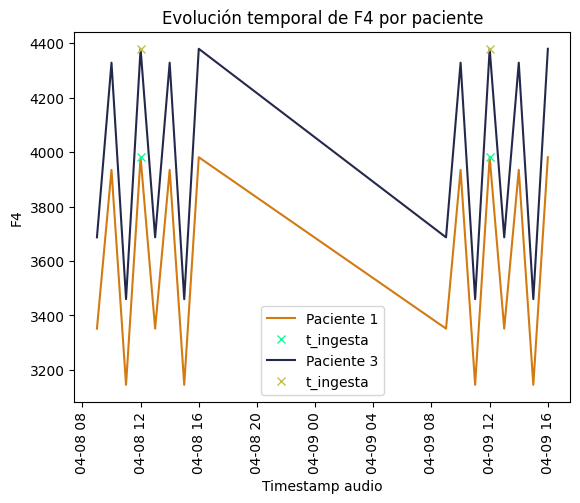

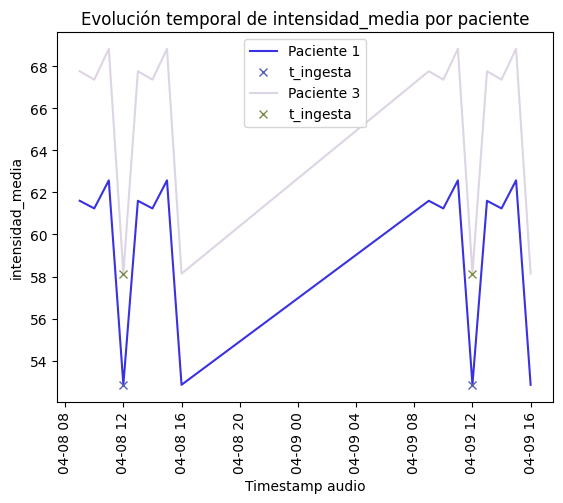

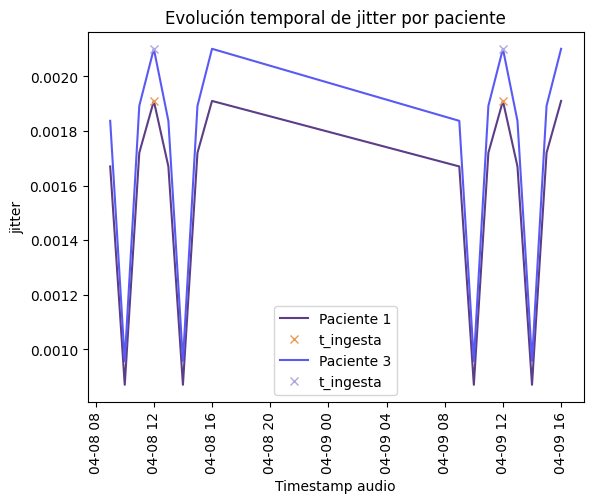

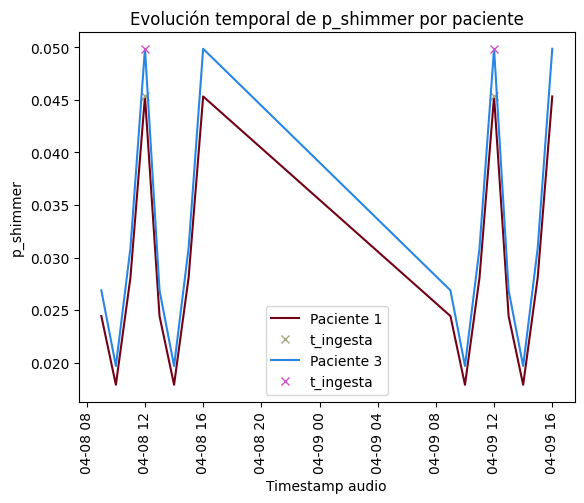

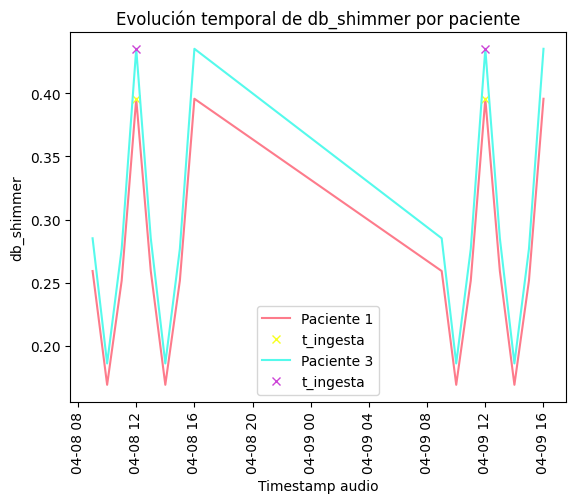

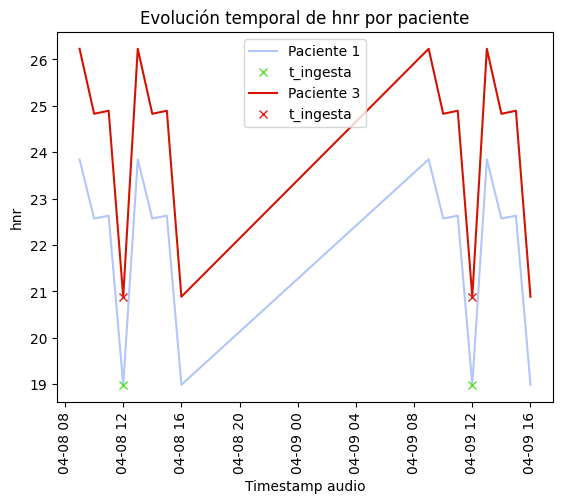

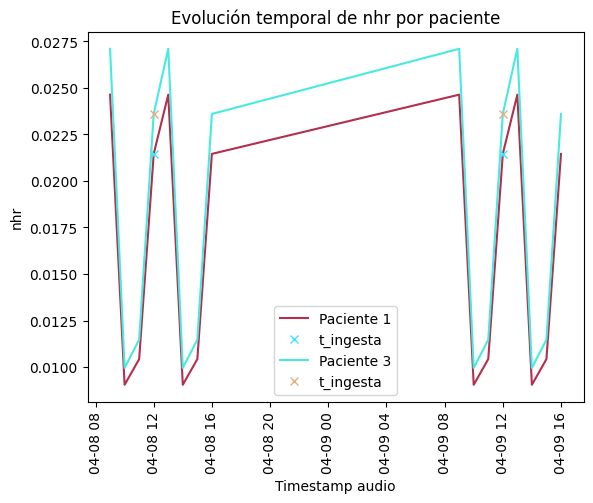

In [7]:
#Gráficos anteriores, solo para Hombres

random.seed(10)

variables = ["F0", "F1", "F2", "F3", "F4", "intensidad_media", "jitter", "p_shimmer", "db_shimmer", "hnr", "nhr"]

pacientes = datos.loc[:,'id_paciente'].unique()

for variable in variables:
    for paciente in pacientes:
        #Se crea un DataFrame para el paciente actual
        df = datos[datos['id_paciente']== paciente].reset_index()
        if df['sexo'][0] == 1:
            #Se recuperan los distintos timestamps de cada audio  
            t_audios = df['t_audio']#.reset_index(drop=True)
        
            #Se guarda la columna que contiene los tiempos de ingesta
            df_ingesta = df[df['dt_ingesta']==0]
            t_ingesta = df_ingesta['t_audio'].values.astype(float)#.unique()
            #Se identifica la variable actual, y se guarda la columna con los datos del paciente de dicha variable
            var = df[variable]

            #Se grafica el valor de cada variable en función de los timestamps
            plt.plot(t_audios, var, label= paciente, color = random_color())
            #Se marcan en el grafico los momentos de ingesta de cada paciente 
            plt.plot( df_ingesta['t_audio'], df_ingesta[variable], 'x', color = random_color(), label = 't_ingesta' )
        else:
            continue
    #Configuraciones del grafico:    
    plt.xlabel('Timestamp audio')
    plt.xticks(rotation = 90)
    plt.ylabel(variable)
    plt.legend()
    plt.title(f'Evolución temporal de {variable} por paciente')

        # Generate a unique file name for each graph
    file_name = f'grafico_hombre_{variable}.png'
    #file_path = f'graficos/deepnote/hombres/{file_name}'
    file_path = f'../../media/graficos/deepnote/hombres/{file_name}'
    
    # Save the plot
    plt.savefig(file_path, dpi=300, bbox_inches='tight')

    plt.show()